<p style="font-size: 22pt; color: green; font-family: 'Times New Roman';">
 Import Modules necessary for running this notebook 
</p>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from tabulate import tabulate

import fun_CondProb as fn

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div><br>
<span style="font-size: 22px; color: green;"> :: FACTS 1.1.1 run</span>     

In [2]:
ssp='ssp585'
# path = f'/projects/kopp/ar2208/factsv1.1.1/coupling.{ssp}/output/'
path = f'/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
# print(df.to_string(index=False))

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div><br>
<p style="font-size: 32px; color: green;">&#10145; EXTRACT :: <span style="color: blue;">data</span> file.</p>

In [3]:
start_year=2020; end_year=2100; unit='cm'; station=0
ssps = ['ssp119', 'ssp126','ssp245','ssp370', 'ssp585']

# Base path of data folder (all ssp).
base_path = '/Users/dota/werk/2022_09_FACTS/0000_facts-OPdata/amarel/ar2208/factsv1.1.1'

#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
# Dictionary of filenames
file_names = {
    'ar5.AIS' : 'ar5AIS.ipccar5.icesheets_AIS',
    'ar5.EAIS': 'ar5AIS.ipccar5.icesheets_EAIS',
    'ar5.WAIS': 'ar5AIS.ipccar5.icesheets_WAIS',
    
    'b19.AIS': 'bamber19.bamber19.icesheets_AIS',
    'b19.EAIS': 'bamber19.bamber19.icesheets_EAIS',
    'b19.WAIS': 'bamber19.bamber19.icesheets_WAIS',

    'd21.AIS': 'deconto21.deconto21.AIS_AIS',
    'd21.EAIS': 'deconto21.deconto21.AIS_EAIS',
    'd21.WAIS': 'deconto21.deconto21.AIS_WAIS',

    'emu.AIS': 'emuAIS.emulandice.AIS',
    'emu.EAIS': 'emuAIS.emulandice.AIS_EAIS',
    'emu.WAIS': 'emuAIS.emulandice.AIS_WAIS',
    'emu.PEN': 'emuAIS.emulandice.AIS_PEN',

    'lar.AIS': 'larmip.larmip.AIS',
    'lar.EAIS': 'larmip.larmip.AIS_EAIS',
    'lar.WAIS': 'larmip.larmip.AIS_WAIS',
    'lar.PEN': 'larmip.larmip.AIS_PEN',
    'lar.SMB': 'larmip.larmip.AIS_SMB',

    'emu.GIS'   : 'emuGrIS.emulandice.GrIS',
    'ISMIP.GIS' : 'GrIS1f.FittedISMIP.GrIS_GIS',
    'ar5.GIS'   : 'ar5AIS.ipccar5.icesheets_GIS',
    
    'ar5.glacier': 'ar5glaciers.ipccar5.glaciers',
    'emu.glacier': 'emuglaciers.emulandice.glaciers',

    'lws': 'lws.ssp.landwaterstorage',
    'ocn': 'ocean.tlm.sterodynamics'    
}
# Dictionary to store the results
AIS_all_ssp = {key: {} for key in file_names}

# Loop over each SSP scenario
for ssp in ssps:
    for key, filename in file_names.items():
        file_path = f'{base_path}/coupling.{ssp}/output/coupling.{ssp}.{filename}_globalsl.nc'
        dat, slc, time, lat, lon = fn.extract_nc_info(file_path, station, unit, start_year, end_year)
        AIS_all_ssp[key][ssp] = {'dat': dat, 'slc': slc, 'time': time, 'lat': lat, 'lon': lon, 'path': file_path}
del dat, slc, time, lat, lon, ssp, file_path, key, file_names



#-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
# Dictionary of filenames
file_names = {
    'wf1e' :'total.workflow.wf1e',
    'wf2e': 'total.workflow.wf2e',
    'wf3e': 'total.workflow.wf3e',
    
    'wf1f' :'total.workflow.wf1f',
    'wf2f': 'total.workflow.wf2f',
    'wf3f': 'total.workflow.wf3f',
    
    'wf4' : 'total.workflow.wf4',
}
# Dictionary to store the results
TOT_all_ssp = {key: {} for key in file_names}

# Loop over each SSP scenario
for ssp in ssps:
    for key, filename in file_names.items():
        file_path = f'{base_path}/coupling.{ssp}/output/coupling.{ssp}.{filename}.global.nc'
        dat, slc, time, lat, lon = fn.extract_nc_info(file_path, station, unit, start_year, end_year)
        TOT_all_ssp[key][ssp] = {'dat': dat, 'slc': slc, 'time': time, 'lat': lat, 'lon': lon, 'path': file_path}
del dat, slc, time, lat, lon, ssp, file_path, key, file_names

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div><br>

<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: black;"> corrections to be made   </span>
<br><br>
remove all _ in filenames<br>
keep globalsl and the correct the total as it is currently global

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div><br>
<p style="font-size: 32px; color: green;">&#10145; SELECT </p>

In [4]:
ssps = ['ssp585']; print(ssps)
years_=[2030,2050,2070,2090, 2100]; print(years_)

['ssp585']
[2030, 2050, 2070, 2090, 2100]


<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div><br>
<p style="font-size: 32px; color: green;">&#10145; Presence of pattern </p>
<br>
<ol style="font-size: 16px; color: blue;">
    <li>Calculate the auto-correlation coefficient (for 1999 lags)</li>
    <li>Use p-value to check pattern presence. <br><span style="font-size: 12px; color: black;">Small pvalue suggests that the autocorrelation coefficient for that lag is significantly different from zero, indicating the presence of a pattern.</span></li>
</ol>

<ul style="font-size: 16px; color: blue;">
    <li>YES => data HAS a pattern (>80% lagged values)</li>
    <li>NO => data DOES NOT have a pattern (>80% lagged values)</li>
    <li>CHK => data MAY have a pattern (>20% lagged values show yes/no together)</li>
</ul>

In [5]:
d=fn.df_samps_trend(ssps,TOT_all_ssp,years_)
df = pd.DataFrame(d)
print(tabulate(df.T, headers='keys', tablefmt='grid'))

+------+--------+--------+--------+--------+--------+
|      | 2030   | 2050   | 2070   | 2090   | 2100   |
+======+========+========+========+========+========+
| wf1e | No     | No     | No     | No     | No     |
+------+--------+--------+--------+--------+--------+
| wf2e | Yes    | Yes    | Yes    | Yes    | Yes    |
+------+--------+--------+--------+--------+--------+
| wf3e | No     | No     | No     | No     | No     |
+------+--------+--------+--------+--------+--------+
| wf1f | No     | No     | No     | No     | No     |
+------+--------+--------+--------+--------+--------+
| wf2f | Yes    | Yes    | Yes    | Yes    | Yes    |
+------+--------+--------+--------+--------+--------+
| wf3f | No     | No     | No     | No     | No     |
+------+--------+--------+--------+--------+--------+
| wf4  | No     | No     | No     | No     | No     |
+------+--------+--------+--------+--------+--------+


In [6]:
d=fn.df_samps_trend(ssps,AIS_all_ssp,years_)
df = pd.DataFrame(d)
print(tabulate(df.T, headers='keys', tablefmt='grid'))

+-------------+--------+--------+--------+--------+--------+
|             | 2030   | 2050   | 2070   | 2090   | 2100   |
+=============+========+========+========+========+========+
| ar5.AIS     | No     | No     | No     | No     | No     |
+-------------+--------+--------+--------+--------+--------+
| ar5.EAIS    | No     | No     | No     | No     | No     |
+-------------+--------+--------+--------+--------+--------+
| ar5.WAIS    | No     | No     | No     | No     | No     |
+-------------+--------+--------+--------+--------+--------+
| b19.AIS     | No     | No     | CHK    | CHK    | No     |
+-------------+--------+--------+--------+--------+--------+
| b19.EAIS    | CHK    | CHK    | CHK    | CHK    | CHK    |
+-------------+--------+--------+--------+--------+--------+
| b19.WAIS    | No     | No     | CHK    | CHK    | No     |
+-------------+--------+--------+--------+--------+--------+
| d21.AIS     | No     | No     | No     | No     | No     |
+-------------+--------+

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div><br>
<p style="font-size: 32px; color: green;">&#10145; <span style="color: blue;">PLOT </span> ::</p>
<p style="font-size: 32px; color: green;">&#10145; <span style="color: blue;">workflows</span> data file.</p>

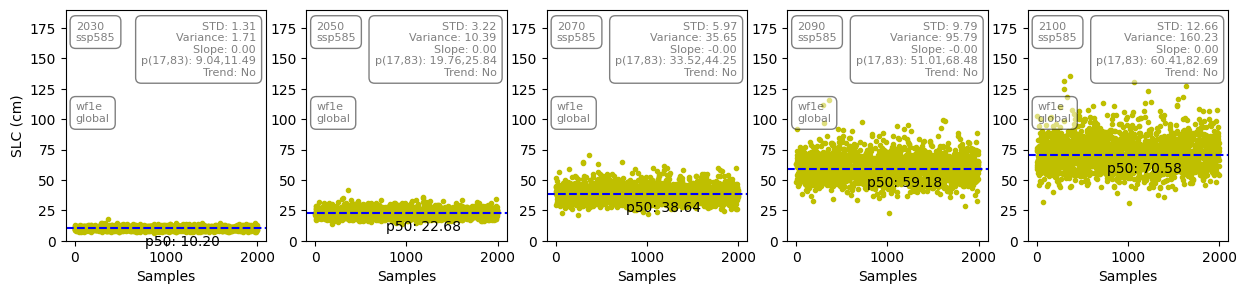

In [7]:
fn.PLOT_samps(ssps,'wf1e',TOT_all_ssp,years_,color='y',yaxis_limit=[0,190])

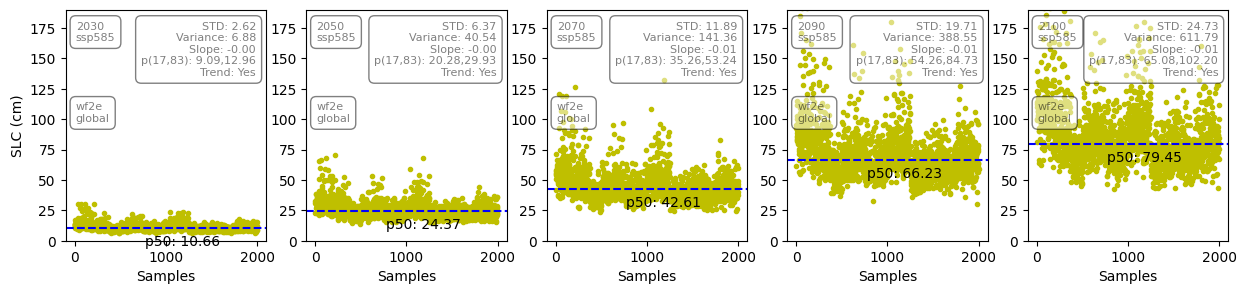

In [8]:
fn.PLOT_samps(ssps,'wf2e',TOT_all_ssp,years_,color='y',yaxis_limit=[0,190])

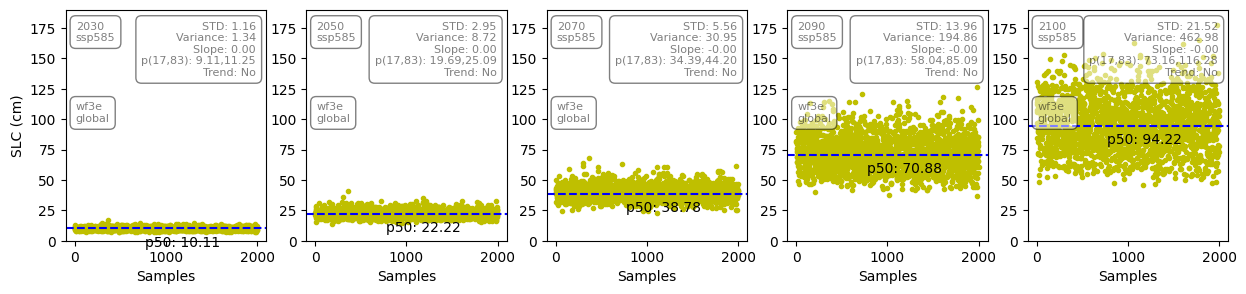

In [9]:
fn.PLOT_samps(ssps,'wf3e',TOT_all_ssp,years_,color='y',yaxis_limit=[0,190])

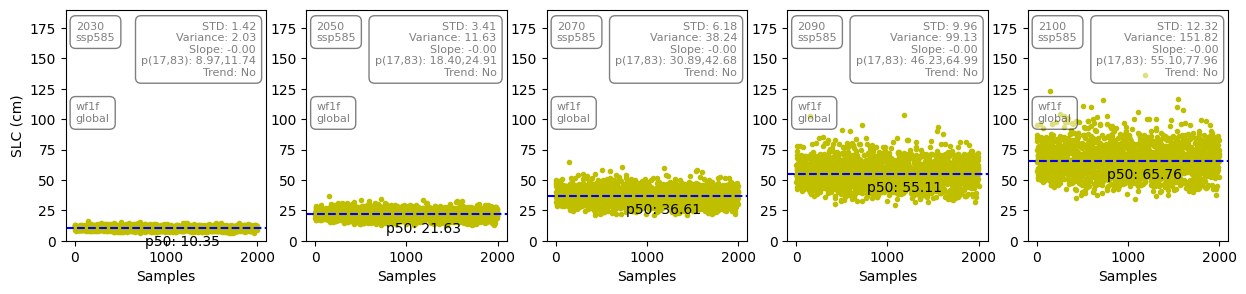

In [10]:
fn.PLOT_samps(ssps,'wf1f',TOT_all_ssp,years_,color='y',yaxis_limit=[0,190])

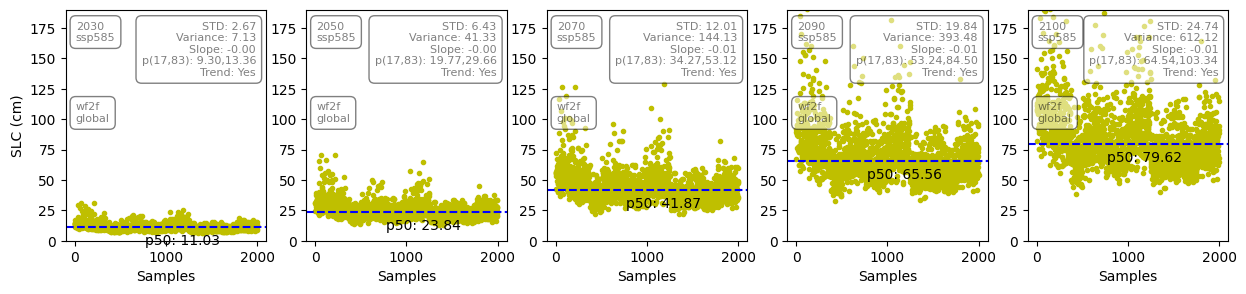

In [11]:
fn.PLOT_samps(ssps,'wf2f',TOT_all_ssp,years_,color='y',yaxis_limit=[0,190])

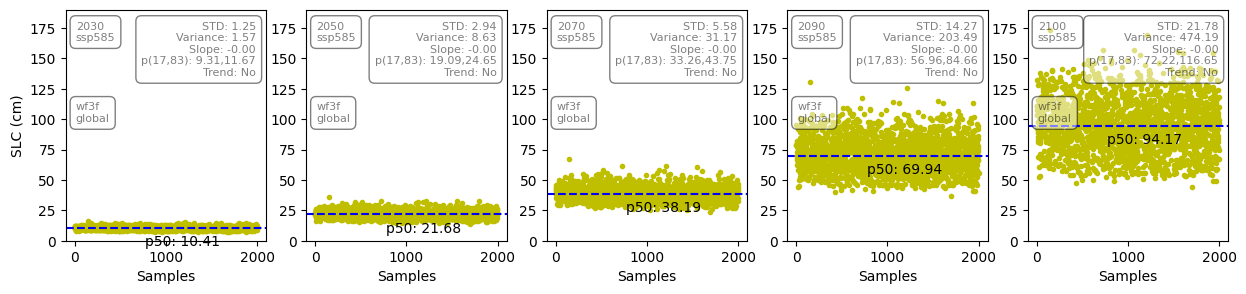

In [12]:
fn.PLOT_samps(ssps,'wf3f',TOT_all_ssp,years_,color='y',yaxis_limit=[0,190])

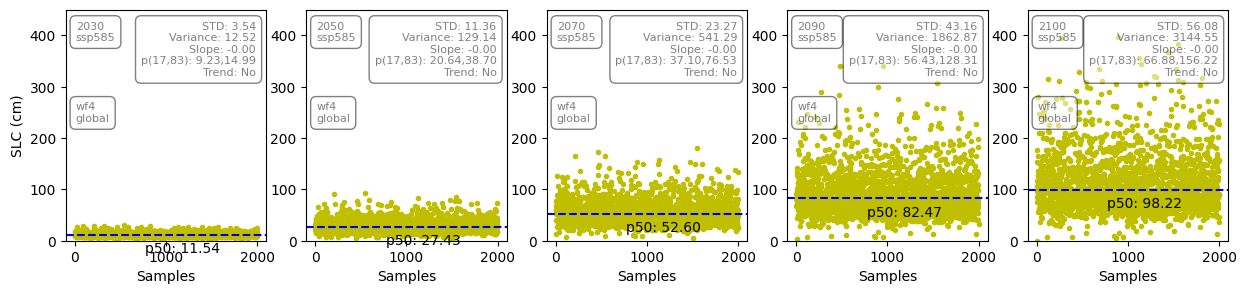

In [13]:
fn.PLOT_samps(ssps,'wf4',TOT_all_ssp,years_,color='y',yaxis_limit=[0,450])

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div><br>
<p style="font-size: 32px; color: green;">&#10145; PLOT <span style="color: blue;">AIS</span> data file.</p>

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: magenta;"> PLOT::   <b>ar5</b></span>

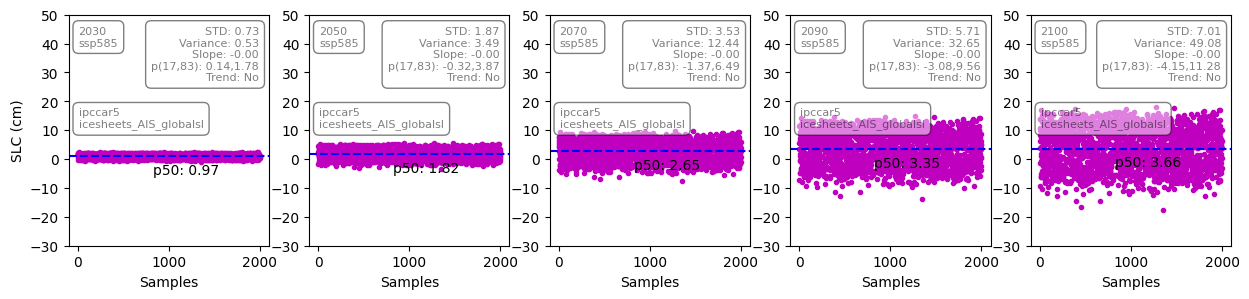

In [14]:
fn.PLOT_samps(ssps,'ar5.AIS',AIS_all_ssp,years_,color='m',yaxis_limit=[-30,50])

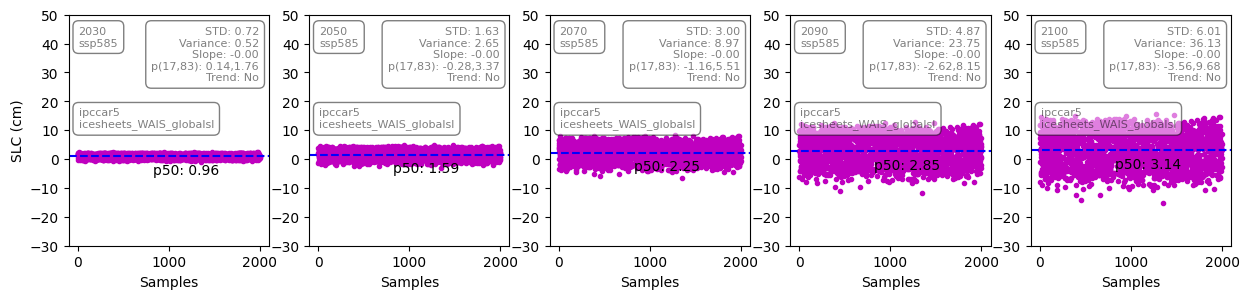

In [15]:
fn.PLOT_samps(ssps,'ar5.WAIS',AIS_all_ssp,years_,color='m',yaxis_limit=[-30,50])

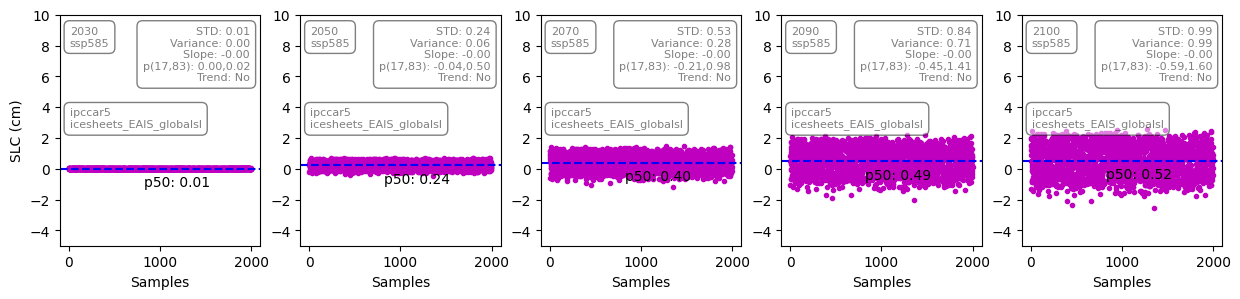

In [16]:
fn.PLOT_samps(ssps,'ar5.EAIS',AIS_all_ssp,years_,color='m',yaxis_limit=[-5,10])

Why is the AIS dominated by WAIS. Is this as expected?

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: cyan;"> PLOT::   <b>bamber19</b></span>

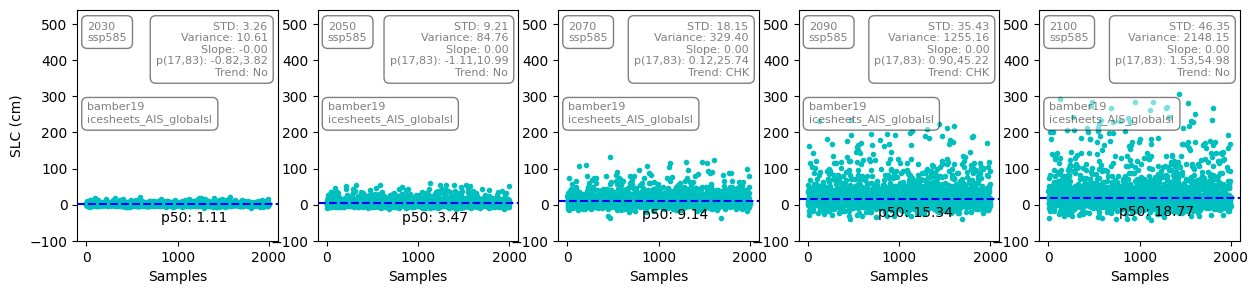

In [17]:
fn.PLOT_samps(ssps,'b19.AIS',AIS_all_ssp,years_,color='c',yaxis_limit=[-100,540])

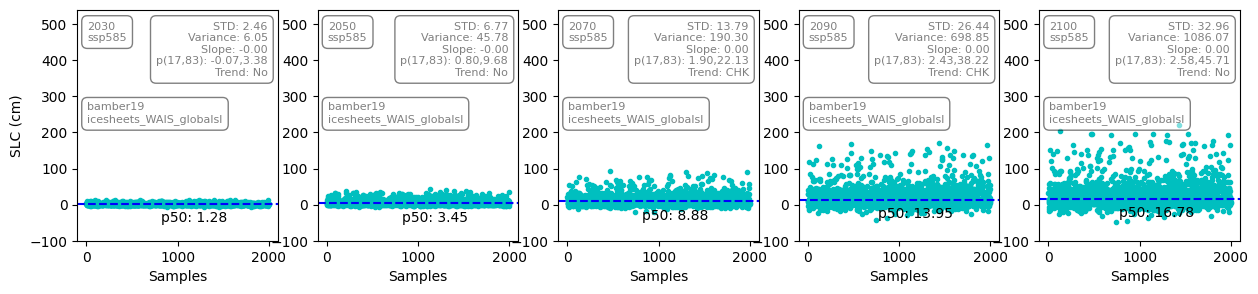

In [18]:
fn.PLOT_samps(ssps,'b19.WAIS',AIS_all_ssp,years_,color='c',yaxis_limit=[-100,540])

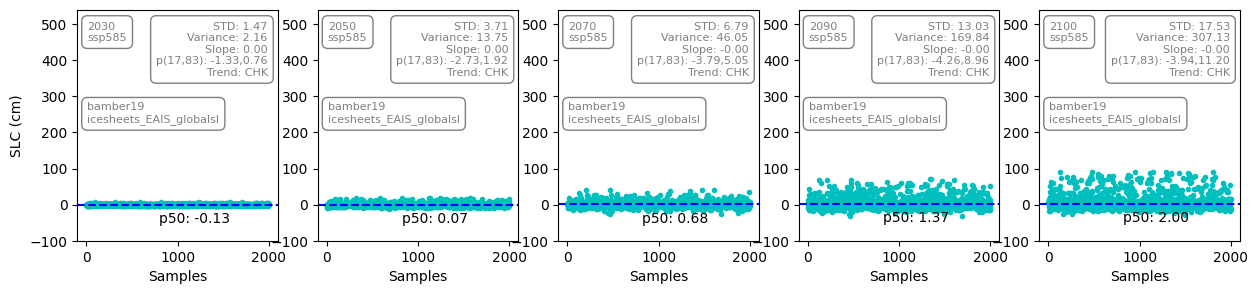

In [19]:
fn.PLOT_samps(ssps,'b19.EAIS',AIS_all_ssp,years_,color='c',yaxis_limit=[-100,540])

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: green;"> PLOT::   <b>deconto21</b></span>

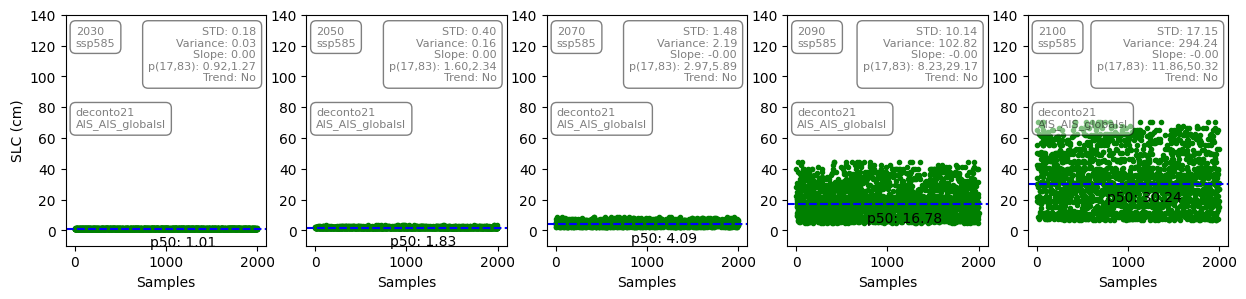

In [20]:
fn.PLOT_samps(ssps,'d21.AIS',AIS_all_ssp,years_,color='g',yaxis_limit=[-10,140])

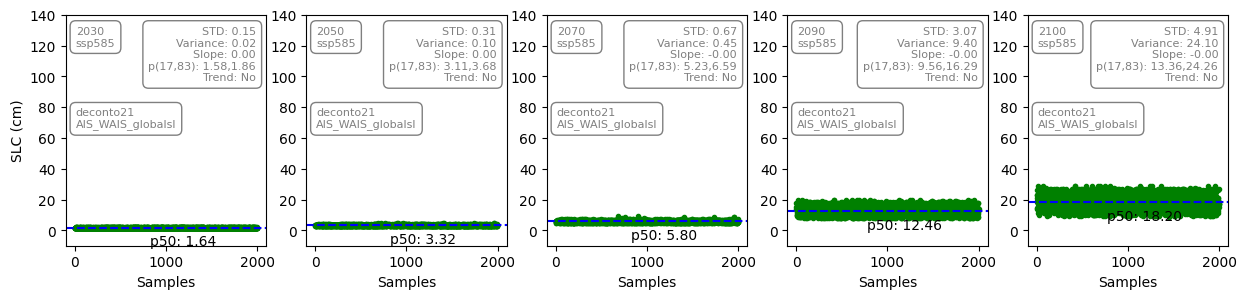

In [21]:
fn.PLOT_samps(ssps,'d21.WAIS',AIS_all_ssp,years_,color='g',yaxis_limit=[-10,140])

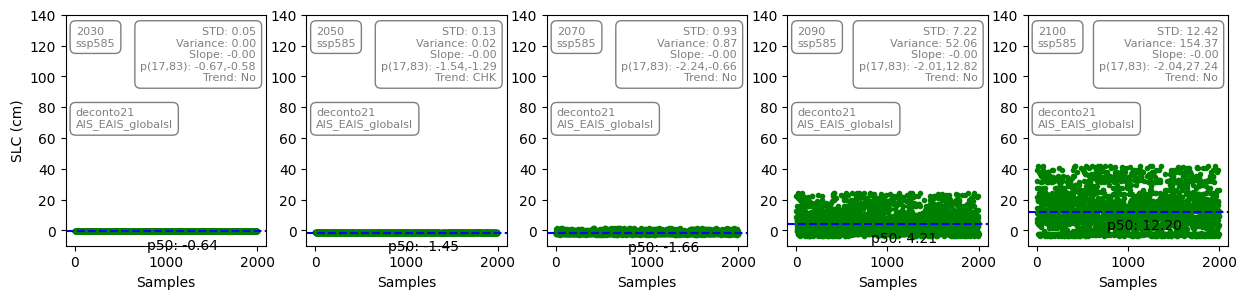

In [22]:
fn.PLOT_samps(ssps,'d21.EAIS',AIS_all_ssp,years_,color='g',yaxis_limit=[-10,140])

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: blue;"> PLOT::   <b>emu</b></span>

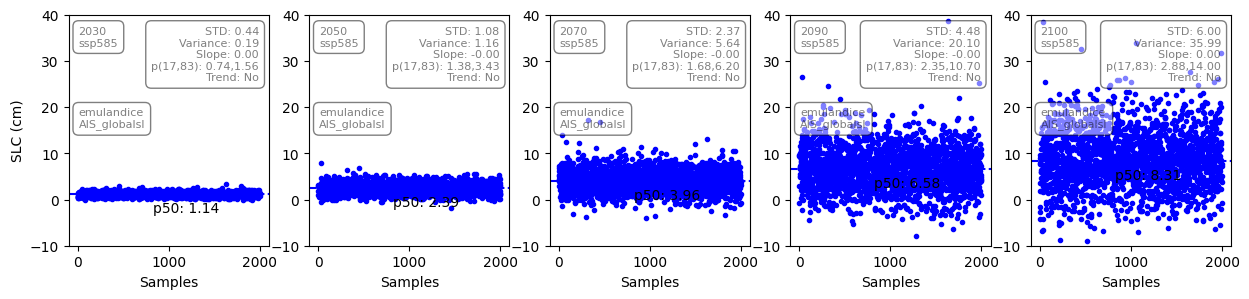

In [23]:
fn.PLOT_samps(ssps,'emu.AIS',AIS_all_ssp,years_,color='b',yaxis_limit=[-10,40])

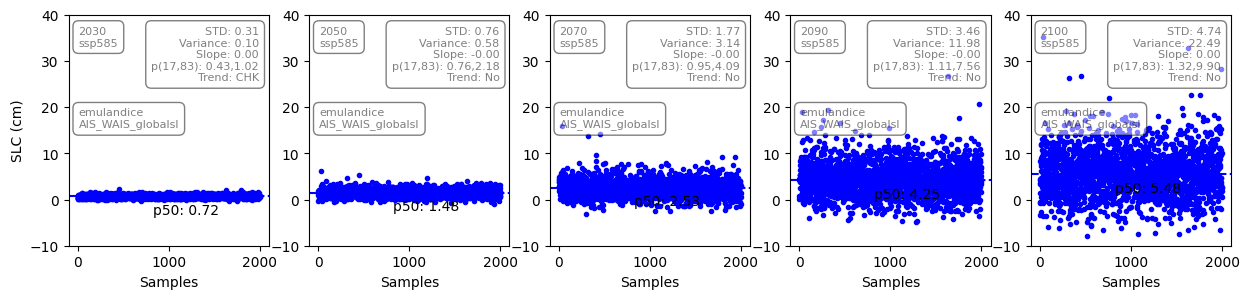

In [24]:
fn.PLOT_samps(ssps,'emu.WAIS',AIS_all_ssp,years_,color='b',yaxis_limit=[-10,40])

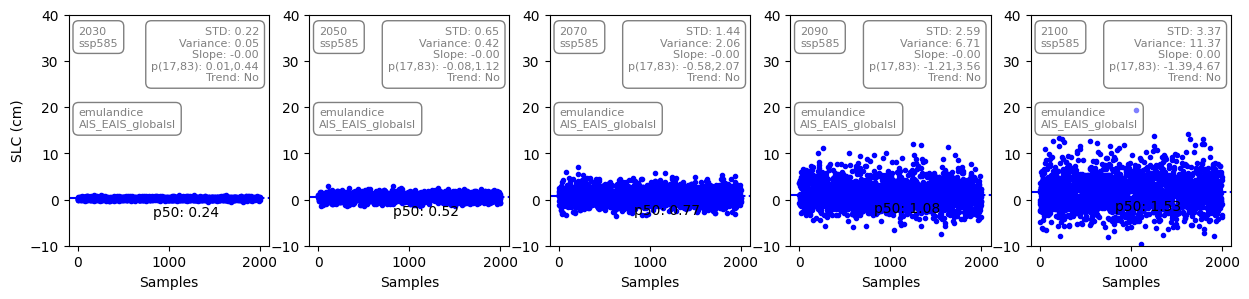

In [25]:
fn.PLOT_samps(ssps,'emu.EAIS',AIS_all_ssp,years_,color='b',yaxis_limit=[-10,40])

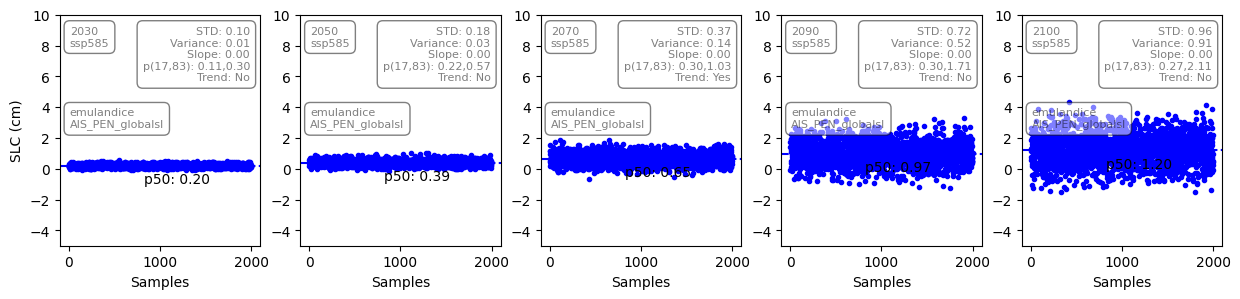

In [26]:
fn.PLOT_samps(ssps,'emu.PEN',AIS_all_ssp,years_,color='b',yaxis_limit=[-5,10])

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 50%; border: none; height: 2px; background-color: yellow; border-style: dotted;">
</div>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
     :: </span> 
<span style="color: red;"> PLOT::   <b>larmip</b></span>

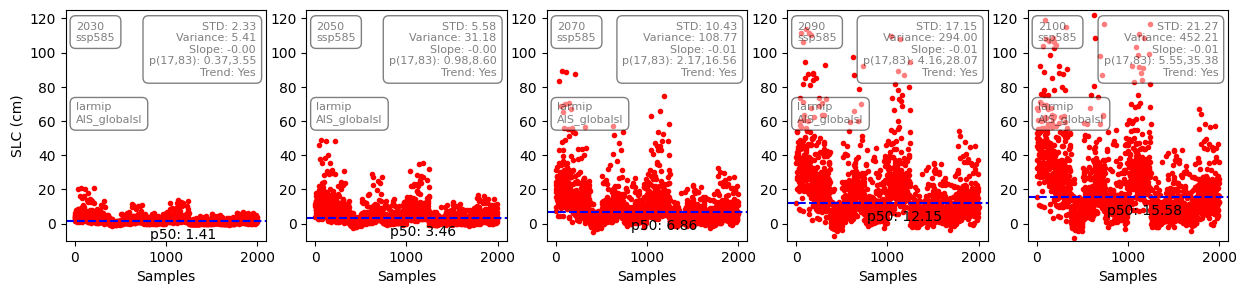

In [27]:
fn.PLOT_samps(ssps,'lar.AIS',AIS_all_ssp,years_,color='r',yaxis_limit=[-10,125])

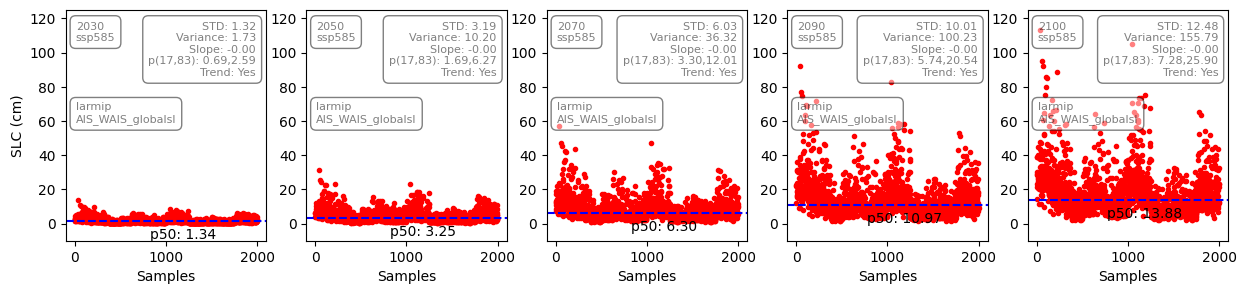

In [28]:
fn.PLOT_samps(ssps,'lar.WAIS',AIS_all_ssp,years_,color='r',yaxis_limit=[-10,125])

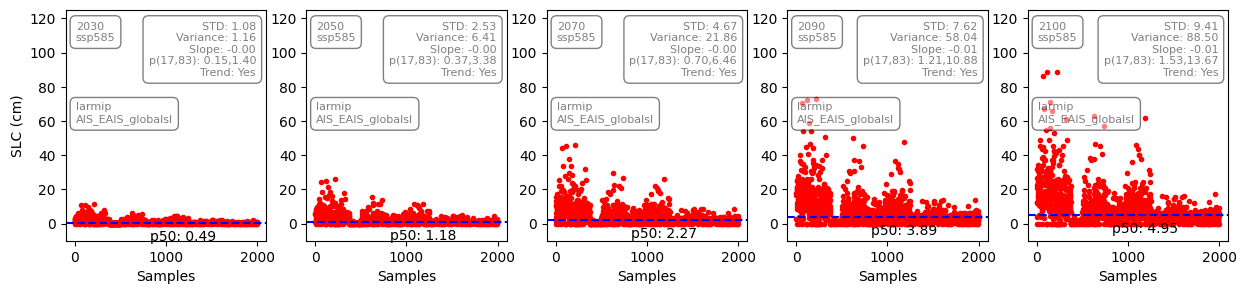

In [29]:
fn.PLOT_samps(ssps,'lar.EAIS',AIS_all_ssp,years_,color='r',yaxis_limit=[-10,125])

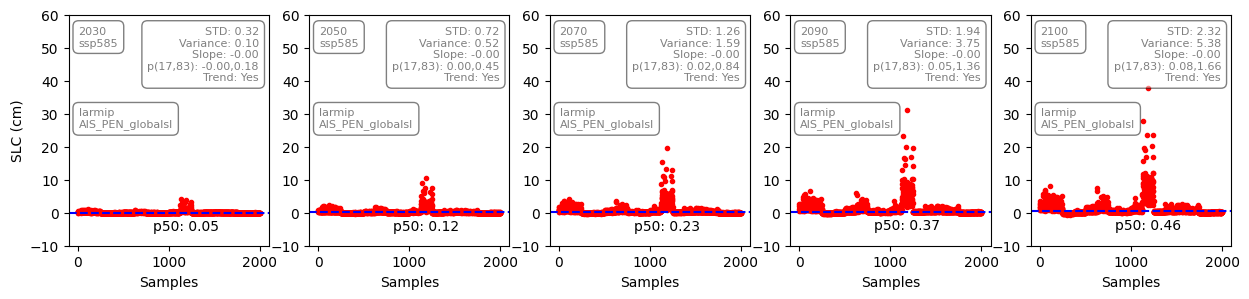

In [30]:
fn.PLOT_samps(ssps,'lar.PEN',AIS_all_ssp,years_,color='r',yaxis_limit=[-10,60])

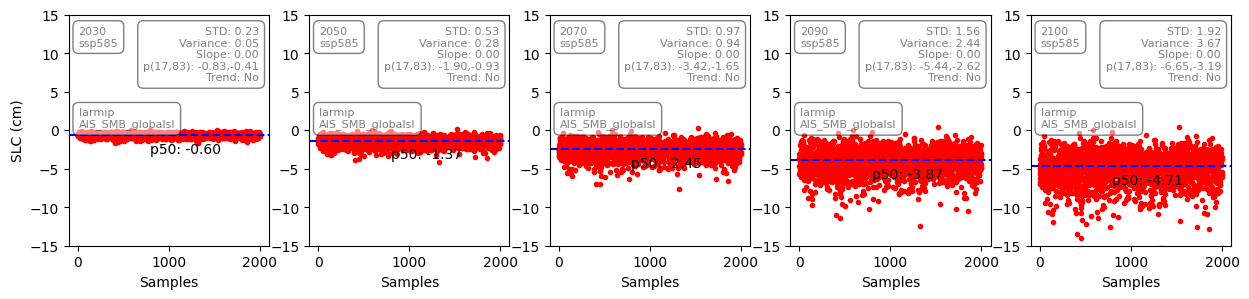

In [31]:
fn.PLOT_samps(ssps,'lar.SMB',AIS_all_ssp,years_,color='r',yaxis_limit=[-15,15])

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div>
<br>
<p style="font-size: 32px; color: green;">&#10145; PLOT <span style="color: blue;">Greenland</span> data file.</p>

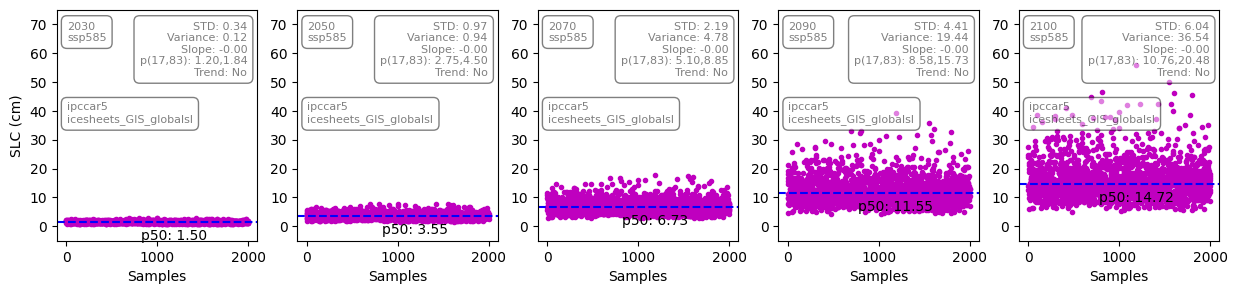

In [32]:
fn.PLOT_samps(ssps,'ar5.GIS',AIS_all_ssp,years_,color='m',yaxis_limit=[-5,75])

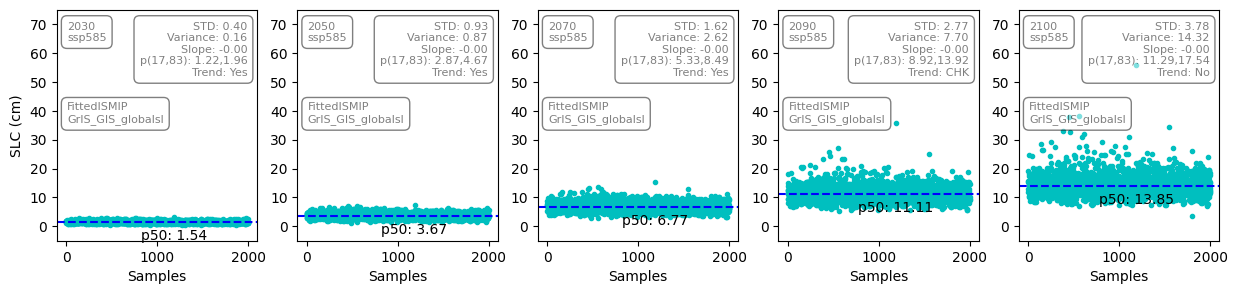

In [33]:
fn.PLOT_samps(ssps,'ISMIP.GIS',AIS_all_ssp,years_,color='c',yaxis_limit=[-5,75])

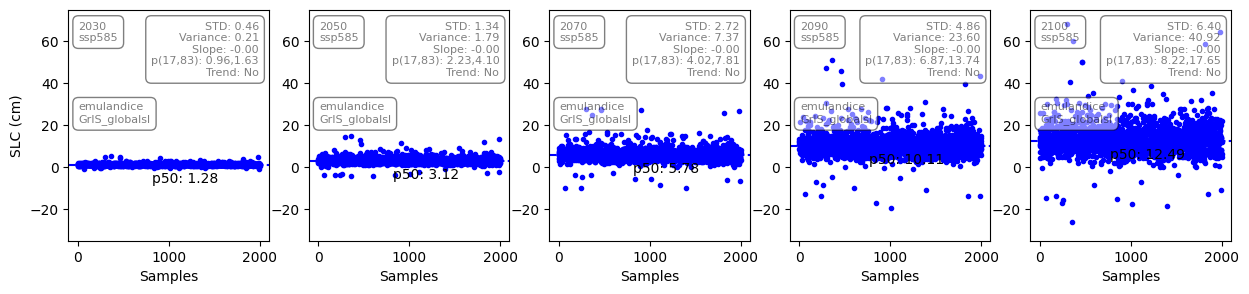

In [34]:
fn.PLOT_samps(ssps,'emu.GIS',AIS_all_ssp,years_,color='b',yaxis_limit=[-35,75])

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div>
<br>
<p style="font-size: 32px; color: green;">&#10145; PLOT <span style="color: blue;">Glacier</span> data file.</p>

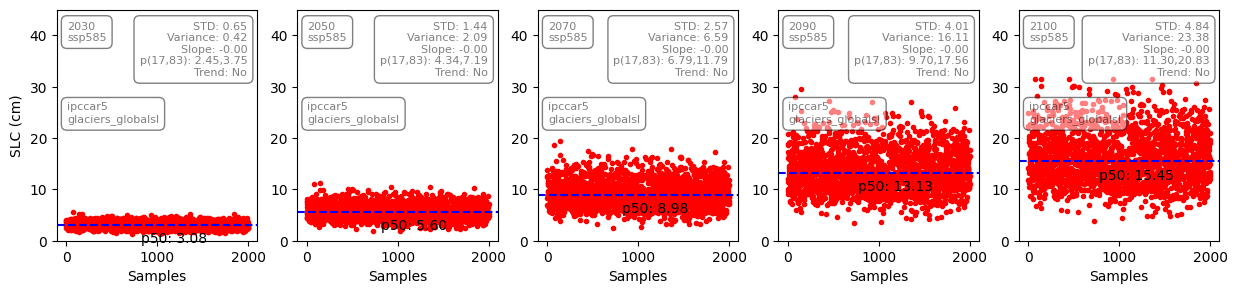

In [35]:
fn.PLOT_samps(ssps,'ar5.glacier',AIS_all_ssp,years_,color='r',yaxis_limit=[0,45])

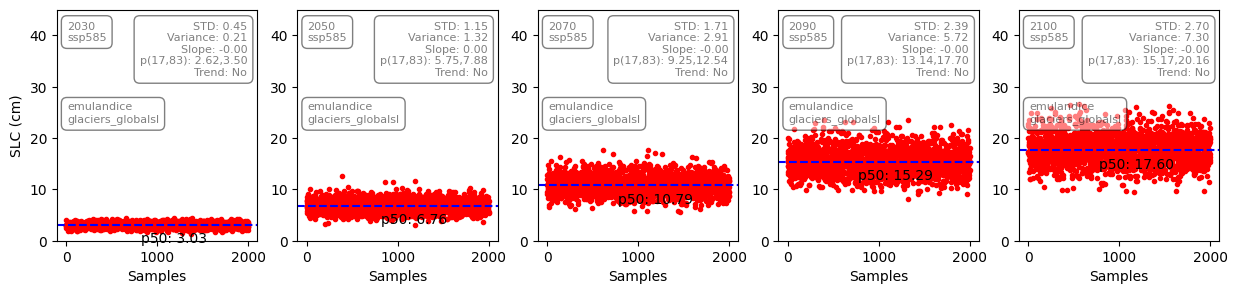

In [36]:
fn.PLOT_samps(ssps,'emu.glacier',AIS_all_ssp,years_,color='r',yaxis_limit=[0,45])

<div style="position: relative; width: 100%;">
    <hr style="position: absolute; left: 0; width: 75%; border: none; height: 2px; background-color: green; border-style: dotted;">
</div>
<br>
<p style="font-size: 32px; color: green;">&#10145; PLOT <span style="color: blue;"> other </span> data file.</p>

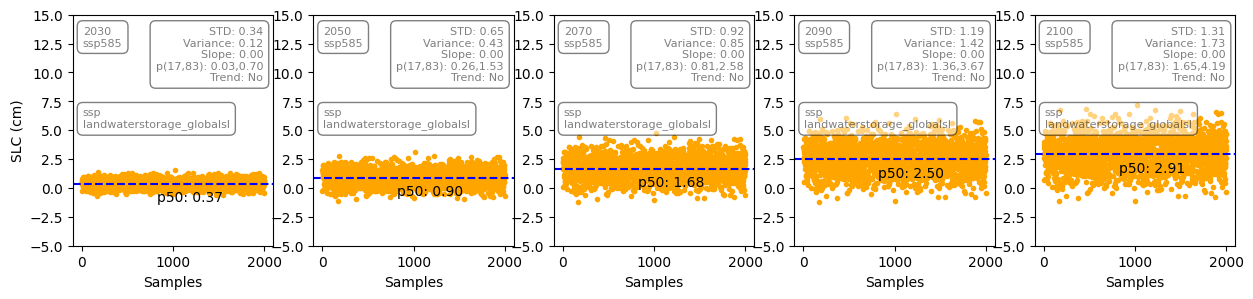

In [37]:
fn.PLOT_samps(ssps,'lws',AIS_all_ssp,years_,color='#FFA500',yaxis_limit=[-5,15])

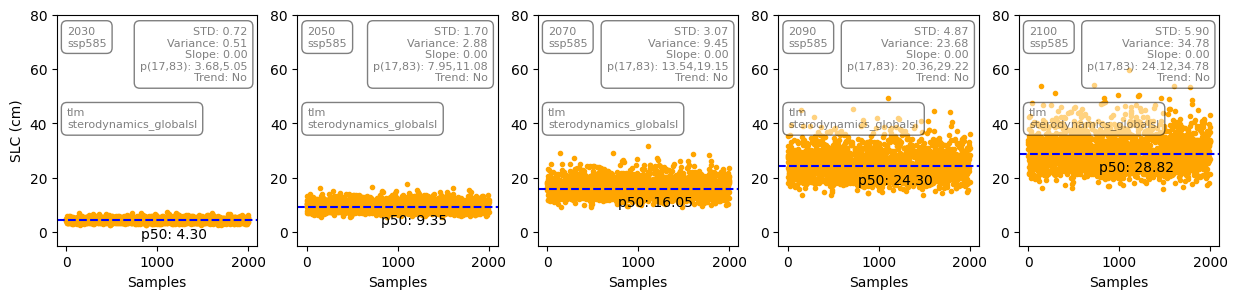

In [38]:
fn.PLOT_samps(ssps,'ocn',AIS_all_ssp,years_,color='#FFA500',yaxis_limit=[-5,80])